# Speech Separation Demo 

## Setting up

In [1]:
from asteroid.models import BaseModel
import soundfile as sf
from librosa import display as lib_display

import matplotlib.pyplot as plt

from IPython import display
%matplotlib widget
import ipywidgets as widgets


## Conv-TasNet

In [2]:
# load the pretrained model from huggingface
model = BaseModel.from_pretrained("mpariente/ConvTasNet_WHAM_sepclean")

raw_mixture, _ = sf.read("assets/exp/m_c-1.wav", dtype="float32", always_2d=True)

# Soundfile returns the mixture as shape (time, channels), and Asteroid expects (batch, channels, time)
mixture = raw_mixture.transpose()
mixture = mixture.reshape(1, mixture.shape[0], mixture.shape[1])

out_wavs = model.separate(mixture)

/home/melih/anaconda3/envs/speech_sep/lib/python3.10/site-packages/huggingface_hub/file_download.py:588: FutureWarning: `cached_download` is the legacy way to download files from the HF hub, please consider upgrading to `hf_hub_download`
  warnings.warn(


In [3]:
def display_sound(index):
    if index == 0:
        display.display(display.Audio(raw_mixture.transpose(), rate=8000))

    elif index == 1:
        display.display(display.Audio(out_wavs[:, 0], rate=8000))

    elif index == 2:
        display.display(display.Audio(out_wavs[:, 1], rate=8000))


widgets.interact(display_sound, index=[
    ('Input Mixture', 0),
    ('Estimate 1', 1),
    ('Estimate 2', 2)
])



interactive(children=(Dropdown(description='index', options=(('Input Mixture', 0), ('Estimate 1', 1), ('Estima…

<function __main__.display_sound(index)>

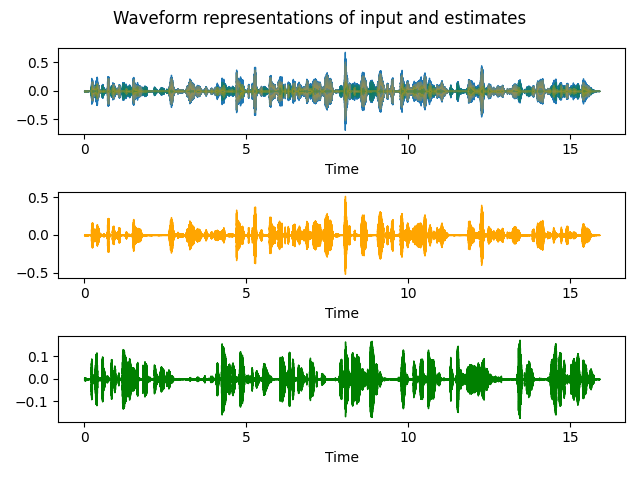

In [4]:
fig, ax = plt.subplots(nrows=3, ncols=1)

fig.suptitle('Waveform representations of input and estimates')
lib_display.waveshow(raw_mixture.transpose(), sr=8000, ax=ax[0])
lib_display.waveshow(out_wavs[:, 1], sr=8000, ax=ax[0], alpha=0.3, color='green')
lib_display.waveshow(out_wavs[:, 0], sr=8000, ax=ax[0], alpha=0.3, color='orange')

lib_display.waveshow(out_wavs[:, 0], sr=8000, ax=ax[1], color='orange')
lib_display.waveshow(out_wavs[:, 1], sr=8000, ax=ax[2], color='green')
fig.tight_layout()
plt.show()

## Try it yourself

1. Select one of the eight possible sounds 
2. Run the inference with the model
3. Evaluate results

In [8]:
# 1. Select the sound
sound_index = 3
raw_sample, _ = sf.read(f"assets/sample/mix_clean/{min(sound_index, 8)}.wav", dtype="float32", always_2d=True)

# Soundfile returns the mixture as shape (time, channels), and Asteroid expects (batch, channels, time)
sample = raw_sample.transpose()
sample = sample.reshape(1, sample.shape[0], sample.shape[1])

In [9]:
sample_out = model.separate(sample)

In [10]:
def display_sound(index):
    if index == 0:
        display.display(display.Audio(raw_sample.transpose(), rate=8000))

    elif index == 1:
        display.display(display.Audio(sample_out[:, 0], rate=8000))

    elif index == 2:
        display.display(display.Audio(sample_out[:, 1], rate=8000))


widgets.interact(display_sound, index=[
    ('Input Mixture', 0),
    ('Estimate 1', 1),
    ('Estimate 2', 2)
])


interactive(children=(Dropdown(description='index', options=(('Input Mixture', 0), ('Estimate 1', 1), ('Estima…

<function __main__.display_sound(index)>